<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#f25625">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Temas Selectos de Ingeniería en Computación III</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2025-1</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="6" color="#f25625">Práctica 1</font></td>
    </tr>
</table>

<p style="text-align:right; font-weight:bold;">Autor: Rodrigo Gael Guzmán Alburo</p>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

<a id="1"></a>
# 1. Ejercicio 1

1. Implementa el siguiente circuito cuántico con Qiskit y simúlalo. Recuerda que, por defecto, el estado inicial es $\ket{000}$, ¿cuál es el estado final? (mide los 3 qubits). El objetivo es averiguar qué hace el circuito cuántico.

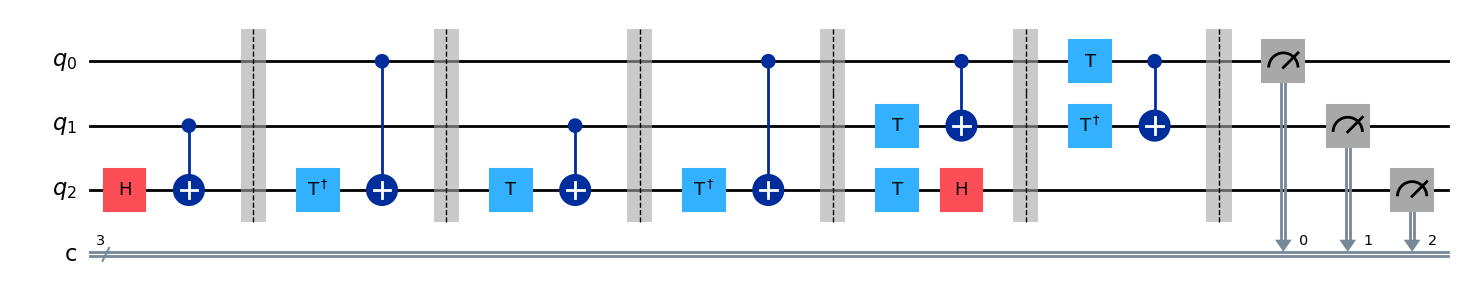

In [1]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

total_results = []
simulator_basic = BasicSimulator()  # simulador basico

def simular(circ, kind, sim, results):
    job = sim.run(circ, shots=1024)
    result = job.result()
    print(kind)
    print(result.get_counts())
    counts = result.get_counts()
    results.append(counts)

def crear_circuito(circ):
    circ.h(2)
    circ.cx(1,2)
    circ.barrier()
    circ.tdg(2)
    circ.cx(0,2)
    circ.barrier()
    circ.t(2)
    circ.cx(1,2)
    circ.barrier()
    circ.tdg(2)
    circ.cx(0,2)
    circ.barrier()
    circ.t(1)
    circ.t(2)
    circ.cx(0,1)
    circ.h(2)
    circ.barrier()
    circ.t(0)
    circ.tdg(1)
    circ.cx(0,1)
    circ.barrier()
    circ.measure([0,1,2], [0,1,2])

test = QuantumCircuit(3, 3)
crear_circuito(test)
test.draw(output='mpl')

000
{'000': 1024}
001
{'001': 1024}
010
{'010': 1024}
011
{'111': 1024}
100
{'100': 1024}
101
{'101': 1024}
110
{'110': 1024}
111
{'011': 1024}


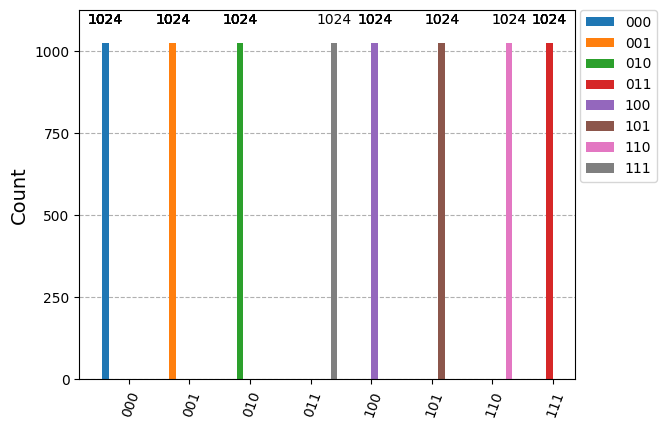

In [ ]:
operations = {
    "000": [],
    "001": [0],
    "010": [1],
    "011": [0, 1],
    "100": [2],
    "101": [0, 2],
    "110": [1, 2],
    "111": [0, 1, 2]
}

for key, exes in operations.items():
    circ = QuantumCircuit(3, 3) # circuito cuantico. al estar dentro del ciclo, se reinicia en cada iteracion
    for ex in exes:
        circ.x(ex)
    crear_circuito(circ)	
    simular(circ, key, simulator_basic, total_results)

plot_histogram(total_results, legend=["000", "001", "010", "011", "100", "101", "110", "111"])

Tabla de Verdad:

|q2|q1|q0|$\rightarrow$|q2|q1|q0|
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|0|0|0|$\rightarrow$|0|0|0|
|0|0|1|$\rightarrow$|0|0|1|
|0|1|0|$\rightarrow$|0|1|0|
|0|1|1|$\rightarrow$|1|1|1|
|1|0|0|$\rightarrow$|1|0|0|
|1|0|1|$\rightarrow$|1|0|1|
|1|1|0|$\rightarrow$|1|1|0|
|1|1|1|$\rightarrow$|0|1|1|

En este circuito se puede observar que el estado final es el mismo que el estado inicial, excepto cuando los qubits q1 y q0 son 1, en cuyo caso el qubit q2 se invierte.<br>
Podemos ver al circuito como una compuerta controlada, donde los qubits q1 y q0 son los controles y el qubit q2 es el objetivo. La compuerta controlada se activa cuando los controles son 1, y en este caso, el objetivo se invierte.

<a id="2"></a>
# 2. Ejercicio 2

2. Implementa la compuerta $SWAP$ pero utilizando su equivalencia de tres compuertas de 2 qubits (tercer diagrama en [esta referencia](https://pennylane.ai/qml/glossary/what-is-a-swap-gate/)) en código de `spinqit`.

[Instruction(gate:CX, qubits:[0, 1], clbits:[], params:[]), Instruction(gate:CX, qubits:[1, 0], clbits:[], params:[]), Instruction(gate:CX, qubits:[0, 1], clbits:[], params:[])]
{'00': 1024}
{'00': 1.0}
[(1+0j), 0j, 0j, 0j]


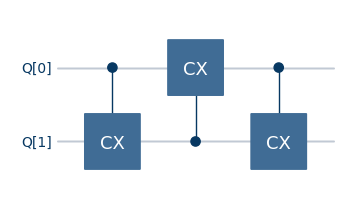

In [ ]:
from spinqit import get_basic_simulator, get_compiler, BasicSimulatorConfig
from spinqit import Circuit, X, CX, draw
from spinqit.utils import print_circuit

circ_2 = Circuit()
q = circ_2.allocateQubits(2)

circ_2 << (CX, (q[0], q[1]))
circ_2 << (CX, (q[1], q[0]))
circ_2 << (CX, (q[0], q[1]))

print(print_circuit(circ_2))

comp = get_compiler()
engine = get_basic_simulator()

exe = comp.compile(circ_2, 0)
draw(exe)

config = BasicSimulatorConfig()
config.configure_shots(1024)
result = engine.execute(exe, config)

print(result.counts)
print(result.probabilities)
print(result.states)

Al realizar las simulaciones, vemos que el estado final es el mismo que el inicial. Esto debido a que el estado inicial es $\ket{00}$. Para observar el funcionamiento de la compuerta SWAP, se debe cambiar el estado inicial a $\ket{01}$ o $\ket{10}$. En el siguiente código, se muestra el funcionamiento de la compuerta SWAP con el estado inicial $\ket{01}$.

[Instruction(gate:X, qubits:[1], clbits:[], params:[]), Instruction(gate:CX, qubits:[0, 1], clbits:[], params:[]), Instruction(gate:CX, qubits:[1, 0], clbits:[], params:[]), Instruction(gate:CX, qubits:[0, 1], clbits:[], params:[])]
{'10': 1024}
{'10': 1.0}
[0j, 0j, (1+0j), 0j]


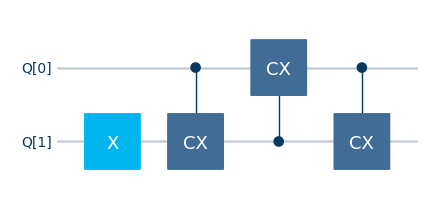

In [ ]:
circ_2 = Circuit()
q = circ_2.allocateQubits(2)

circ_2 << (X, q[1]) # Se aplica una compuerta X al qubit 1. Teniendo un estado inicial de |01> (orden de spinqit)
circ_2 << (CX, (q[0], q[1]))
circ_2 << (CX, (q[1], q[0]))
circ_2 << (CX, (q[0], q[1]))

print(print_circuit(circ_2))

comp = get_compiler()
engine = get_basic_simulator()

exe = comp.compile(circ_2, 0)
draw(exe)

config = BasicSimulatorConfig()
config.configure_shots(1024)
result = engine.execute(exe, config)

print(result.counts)
print(result.probabilities)
print(result.states)

En este caso se tiene que el estado final es $\ket{10}$, lo cual es el resultado esperado al aplicar la compuerta SWAP en el estado inicial $\ket{01}$.
Es improtante recalcar que dentro de spinqit, el qubit 0 es el más significativo y el qubit 1 es el menos significativo $\big(\ket{q_0 q_1}\big)$.

<a id="3"></a>
# 3. Ejercicio 3

3. **[Opcional]** Implementa el siguiente circuito cuántico con Qiskit y simúlalo. ¿Qué crees que hace este circuito?

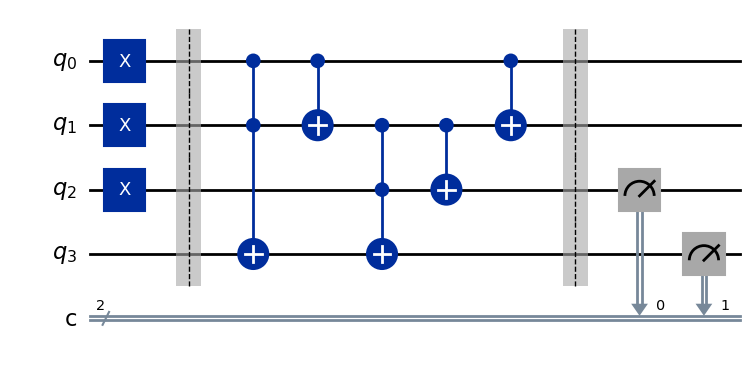

In [ ]:
test = QuantumCircuit(4,2) # circuito cuantico con 4 qubits y 2 bits clasicos
simulator_3 = BasicSimulator() # simulador basico
total_results_3 = []

def crear_circuito_3(ct):
    ct.barrier()
    ct.ccx(0, 1, 3)
    ct.cx(0, 1)
    ct.ccx(1, 2, 3)
    ct.cx(1, 2)
    ct.cx(0, 1)
    ct.barrier()
    ct.measure([2, 3], [0, 1])

test.x(0)
test.x(1)
test.x(2)
crear_circuito_3(test)
test.draw(output='mpl')

0000
{'00': 1024}
0001
{'01': 1024}
0010
{'01': 1024}
0011
{'10': 1024}
0100
{'01': 1024}
0101
{'10': 1024}
0110
{'10': 1024}
0111
{'11': 1024}
1000
{'10': 1024}
1001
{'11': 1024}
1010
{'11': 1024}
1011
{'00': 1024}
1100
{'11': 1024}
1101
{'00': 1024}
1110
{'00': 1024}
1111
{'01': 1024}


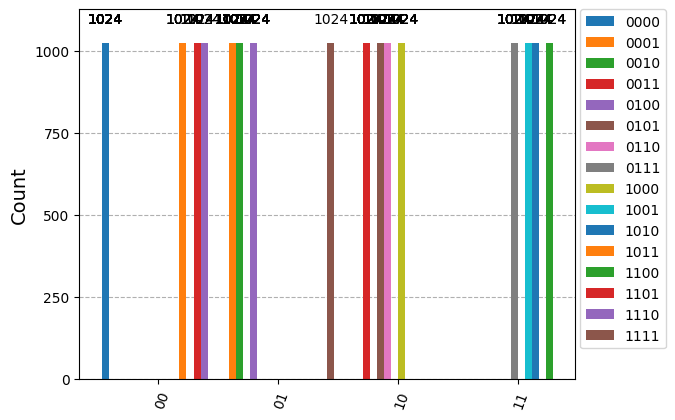

In [ ]:
operations = {
    "0000": [],
    "0001": [0],
    "0010": [1],
    "0011": [0, 1],
    "0100": [2],
    "0101": [0, 2],
    "0110": [1, 2],
    "0111": [0, 1, 2],
    "1000": [3],
    "1001": [0, 3],
    "1010": [1, 3], 
    "1011": [0, 1, 3],
    "1100": [2, 3],
    "1101": [0, 2, 3],
    "1110": [1, 2, 3],
    "1111": [0, 1, 2, 3]
}

for key, exes in operations.items():
    circ = QuantumCircuit(4, 2)
    for ex in exes:
        circ.x(ex)
    crear_circuito_3(circ)
    simular(circ, key, simulator_3, total_results_3)

plot_histogram(total_results_3, legend=["0000", "0001", "0010", "0011", "0100", "0101", "0110", "0111", "1000", "1001", "1010", "1011", "1100", "1101", "1110", "1111"])
    

Tabla de Verdad:

|q3|q2|q1|q0|$\rightarrow$|q3|q2|
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|0|0|0|0|$\rightarrow$|0|0|
|0|0|0|1|$\rightarrow$|0|1|
|0|0|1|0|$\rightarrow$|0|1|
|0|0|1|1|$\rightarrow$|1|0|
|0|1|0|0|$\rightarrow$|0|1|
|0|1|0|1|$\rightarrow$|1|0|
|0|1|1|0|$\rightarrow$|1|0|
|0|1|1|1|$\rightarrow$|1|1|
|1|0|0|0|$\rightarrow$|1|0|
|1|0|0|1|$\rightarrow$|1|1|
|1|0|1|0|$\rightarrow$|1|1|
|1|0|1|1|$\rightarrow$|0|0|
|1|1|0|0|$\rightarrow$|1|1|
|1|1|0|1|$\rightarrow$|0|0|
|1|1|1|0|$\rightarrow$|0|0|
|1|1|1|1|$\rightarrow$|0|1|

De acuerdo a esta tabla de verdad, se puede observar que el circuito cuántico aplica la operación de suma módulo 4. Es decir, las salidas del circuito representa el sumar los valores de los qubits de entrada y aplicar el módulo 4 al resultado. <br> 

Por ejemplo, si los qubits de entrada son $\ket{0110}$, entonces el resultado del circuito es $0+1+1+0 = 2mod{4}=2$.